# Feature Engineering: An Example in House Price Prediction

An Example to show using feature engineering for house price prediction

Some strategies/programs are obtained from Serigne and Pedro Marcelino.

The program is extracted from Tapan Amin's Master's Project in the Department of Computer Science at ODU.

Yaohang Li
Old Dominion University

### Description of the 79 attributes
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cross_validation import cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## read datasets

In [2]:
df_train = pd.read_csv('train.csv')

## A glance at the data

In [3]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Let's build a baseline model

### First of all, some columns have missing values. Let's remove those columns first.

In [5]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [6]:
missing_data_index = missing_data[missing_data.Total>0].index

In [7]:
X = df_train.drop(missing_data_index, axis=1)
X.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Some attributes are categorial. We need to create some dummy variables to convert them to 'one-hot' encoding.

In [8]:
X = pd.get_dummies(X)

In [9]:
X.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


### Now we are ready to build the baseline model

In [10]:
y_train = X['SalePrice']
x_train = X.drop('SalePrice', axis=1)

In [11]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
# model = lm.fit(x_train,y_train)
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  -10482429.611275593


### It is very bad! Wait, the attributes such as 'Id', 'MSSubClass' are not relevant to 'SalePrice' at all. They need to be removed.

In [12]:
x_train = X.drop(['Id', 'MSSubClass', 'SalePrice'], axis=1)

In [13]:
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  -1736573.4198557711


### Not as bad as before. But still very bad. We need to start over and think about each attribute. 

### First of all, let's take care of the missing values.

PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [14]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")

MiscFeature : data description says NA means "no misc feature"

In [15]:
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

Alley : data description says NA means "no alley access"

In [16]:
df_train["Alley"] = df_train["Alley"].fillna("None")

Fence : data description says NA means "no fence"

In [17]:
df_train["Fence"] = df_train["Fence"].fillna("None")

FireplaceQu : data description says NA means "no fireplace"

In [18]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [19]:
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [20]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [24]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [25]:
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [26]:
df_train = df_train.drop(['Utilities'], axis=1)

Functional : data description says NA means typical

In [27]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [28]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [29]:
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [30]:
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [31]:
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [32]:
df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")

Any more missing values?

In [33]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


## Correlations between the attributes

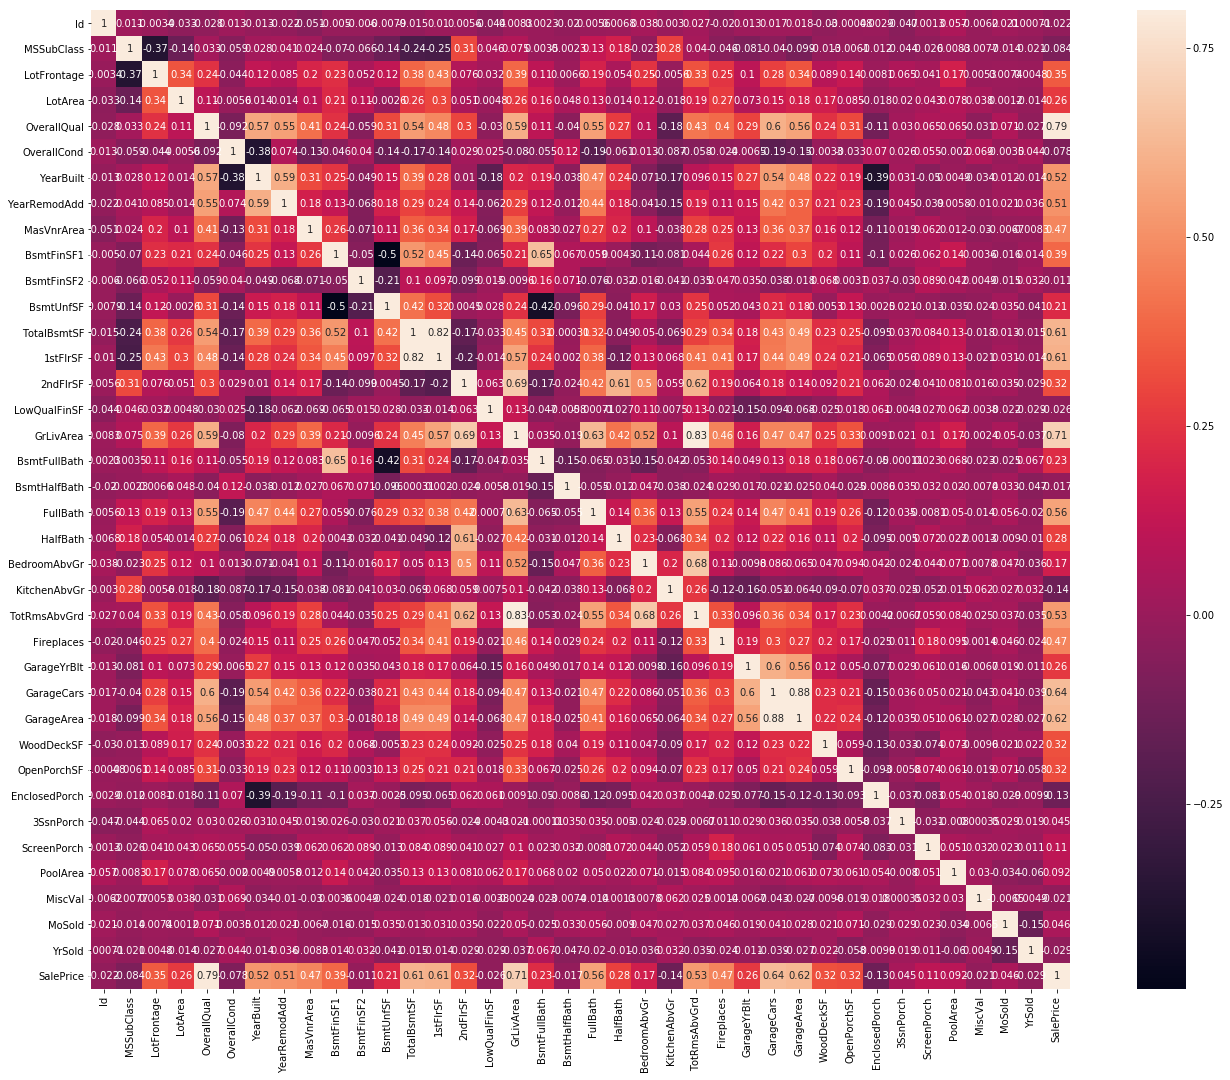

In [34]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True);

### OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrad, and YearBuilt are the top-9 attributes most positively correlated to SalePrice!
### Let's build the model using these top-9 attributes

In [35]:
x_train = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']]

In [36]:
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  0.7648465255015087


## Let's look at these most SalePrice-related attributes more carefully

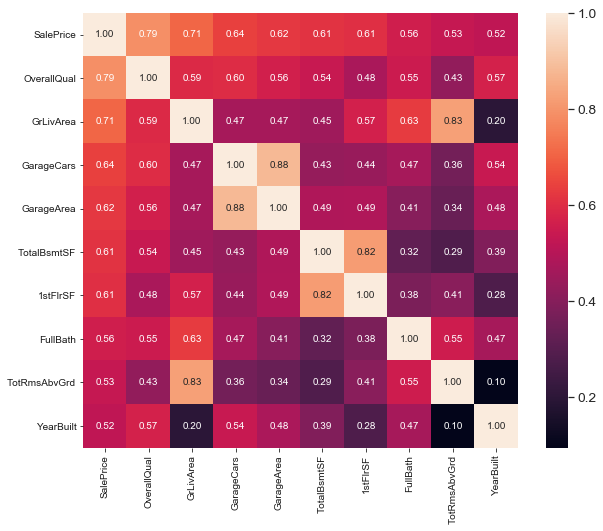

In [37]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
plt.subplots(figsize=(10, 8))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### "GarageArea and GarageCars", "1stFlrSF and TotalBsmtSF", "GrLivArea and TotRmsAbvGrd" are strongly correlated. Of course!

### Let's remove the highly correlated ones and do it again.

In [38]:
x_train = df_train[['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt']]

In [39]:
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  0.7650346626585564


## Let's look at these attributes more carefully.

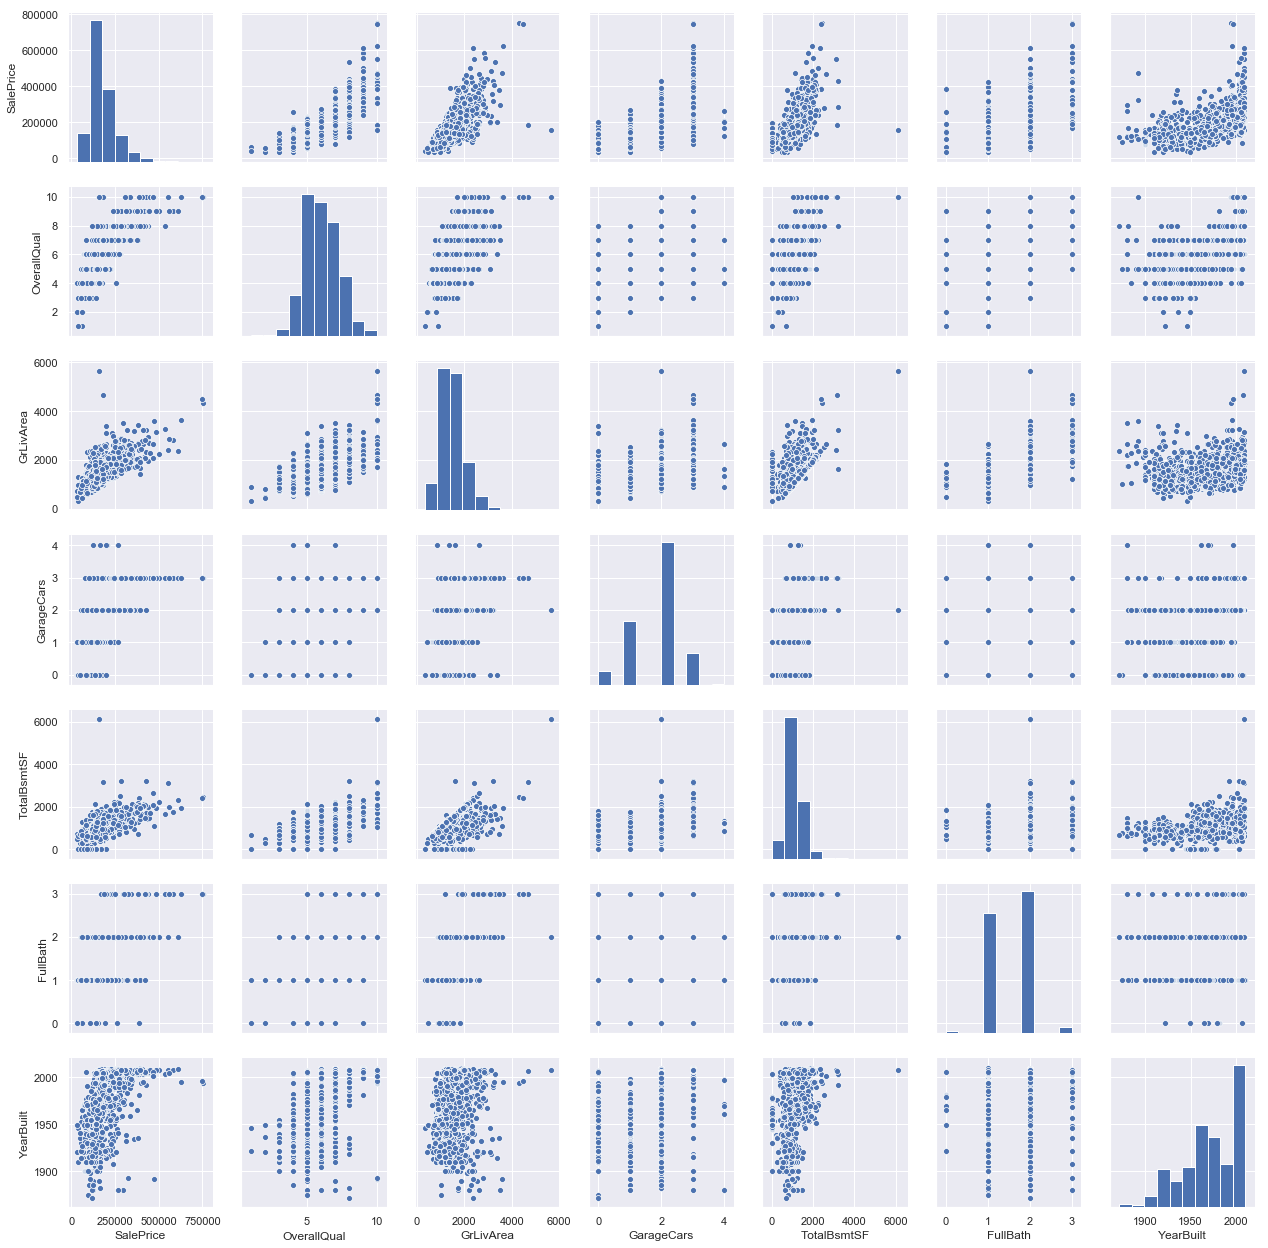

In [40]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

### 1. SalePrice is like Normal Distribution, but not quite normal!
### 2. In the GrLivArea and TotalBsmtSF plot, there is almost a diagonal line. GrLivArea = TotalBsmtSF in many cases, but not always. In some situation, GrLivArea > TotalBsmtSF.
### 3. There are outliers.
## Let's address these problems one by one.

## First of all, let's deal with 'SalePrice'

In [41]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Skewness is a measure of symmetry, or more precisely, the lack of symmetry. The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right.

The standard normal distribution has a kurtosis of zero. Positive kurtosis indicates a "heavy-tailed" distribution and negative kurtosis indicates a "light tailed" distribution.

Mu: 180921.195890
Sigma: 79415.291886


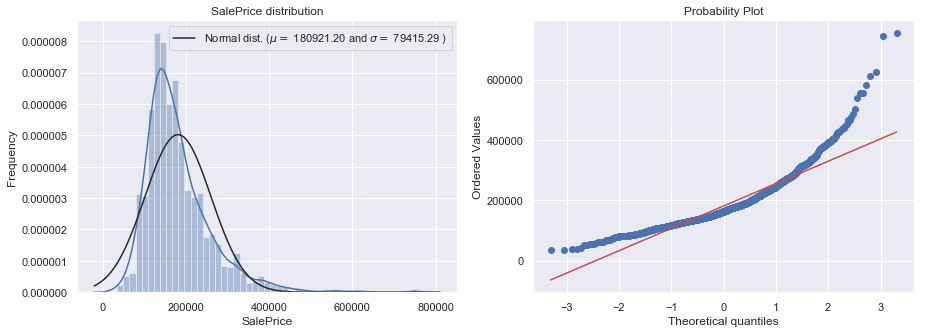

In [42]:
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,5)
sns.distplot(df_train['SalePrice'], fit=norm, ax=ax1)
(mu, sigma) = norm.fit(df_train['SalePrice'])
print("Mu: %f" % mu)
print("Sigma: %f" % sigma)

#Now plot the distribution
ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('SalePrice distribution')

#plt.figure()
# fig.savefig('saleprice distribution')
stats.probplot(df_train['SalePrice'], plot=ax2)
figure.savefig('saleprice distribution')

Mu: 12.024057
Sigma: 0.399312


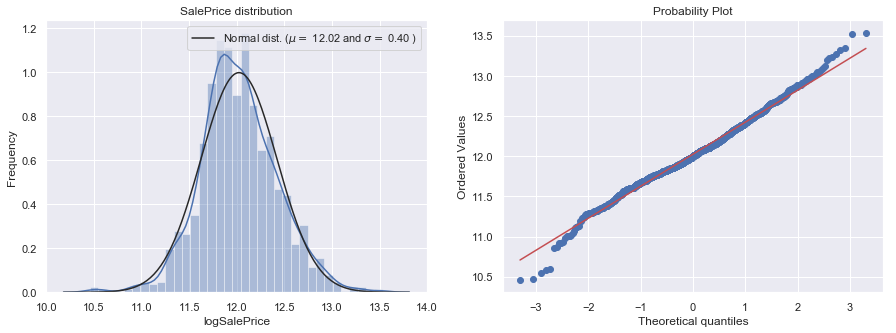

In [43]:
df_train["logSalePrice"] = np.log1p(df_train["SalePrice"])
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,5)
sns.distplot(df_train['logSalePrice'], fit=norm, ax=ax1)
(mu, sigma) = norm.fit(df_train['logSalePrice'])
print("Mu: %f" % mu)
print("Sigma: %f" % sigma)

#Now plot the distribution
ax1.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('SalePrice distribution')

#plt.figure()
# fig.savefig('saleprice distribution')
stats.probplot(df_train['logSalePrice'], plot=ax2)
figure.savefig('saleprice distribution')

In [44]:
print("Skewness: %f" % df_train['logSalePrice'].skew())
print("Kurtosis: %f" % df_train['logSalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519


In [45]:
x_train = df_train[['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt']]
y_train = df_train['logSalePrice']
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  0.7960845464076536


## Handling outliers

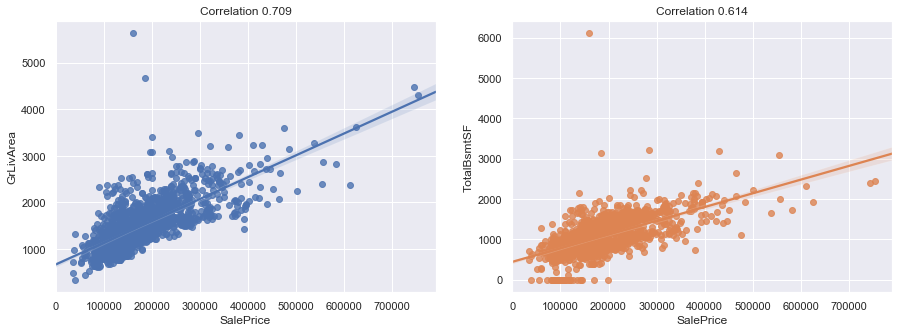

In [46]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,5)
sns.regplot(df_train['SalePrice'], df_train['GrLivArea'], ax=ax1)
ax1.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['GrLivArea'])))
sns.regplot(df_train['SalePrice'], df_train['TotalBsmtSF'], ax=ax2)
ax2.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['TotalBsmtSF'])))
plt.show()

### Remove the outliers

In [47]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<200000)].index)
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>6000) & (df_train['SalePrice']<200000)].index)

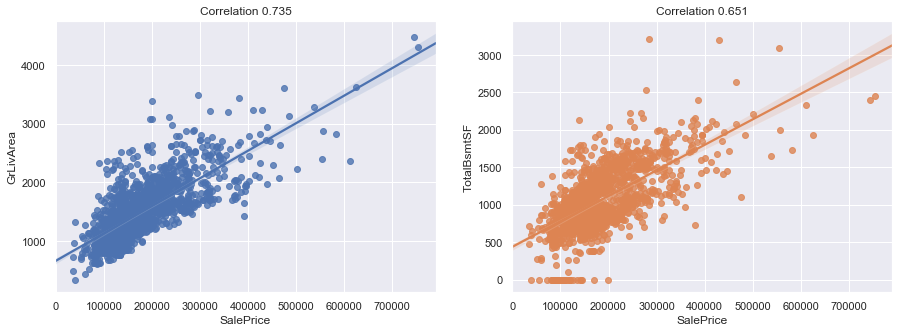

In [48]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,5)
sns.regplot(df_train['SalePrice'], df_train['GrLivArea'], ax=ax1)
ax1.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['GrLivArea'])))
sns.regplot(df_train['SalePrice'], df_train['TotalBsmtSF'], ax=ax2)
ax2.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['TotalBsmtSF'])))
plt.show()

In [49]:
x_train = df_train[['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt']]
y_train = df_train['logSalePrice']
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  0.8370894975072727


## Combining Attributes

### Total Square Feet

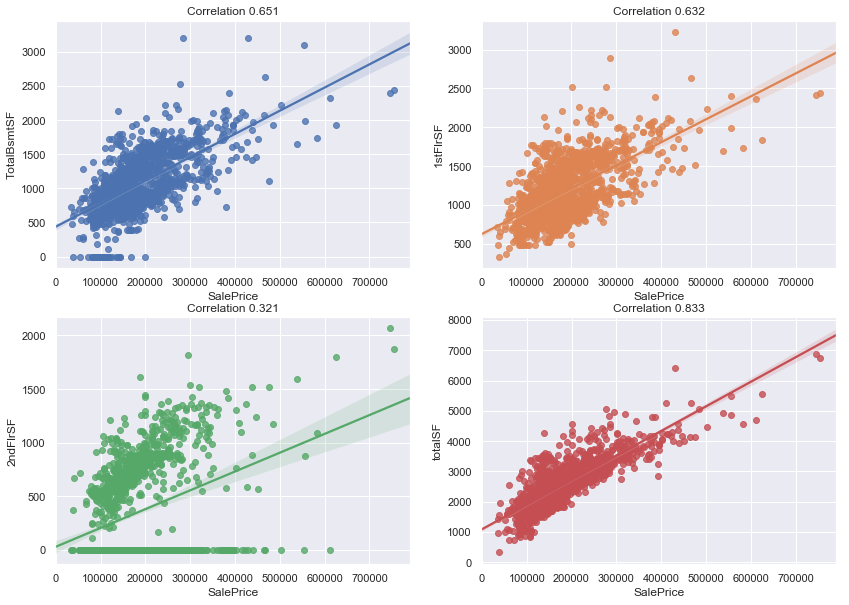

In [50]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)

sns.regplot(df_train['SalePrice'], df_train['TotalBsmtSF'], ax=ax1)
ax1.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['TotalBsmtSF'])))

sns.regplot(df_train['SalePrice'], df_train['1stFlrSF'], ax=ax2)
ax2.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['1stFlrSF'])))

sns.regplot(df_train['SalePrice'], df_train['2ndFlrSF'], ax=ax3)
ax3.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['2ndFlrSF'])))

df_train['totalSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['TotalBsmtSF']
sns.regplot(df_train['SalePrice'], df_train['totalSF'], ax=ax4)
ax4.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['totalSF'])))
ax4.set_ylabel('totalSF')

plt.show()

In [51]:
x_train = df_train[['OverallQual', 'GrLivArea', 'GarageArea', 'FullBath', 'YearBuilt', 'totalSF']]
y_train = df_train['logSalePrice']
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  0.8457736804018943


### Bath

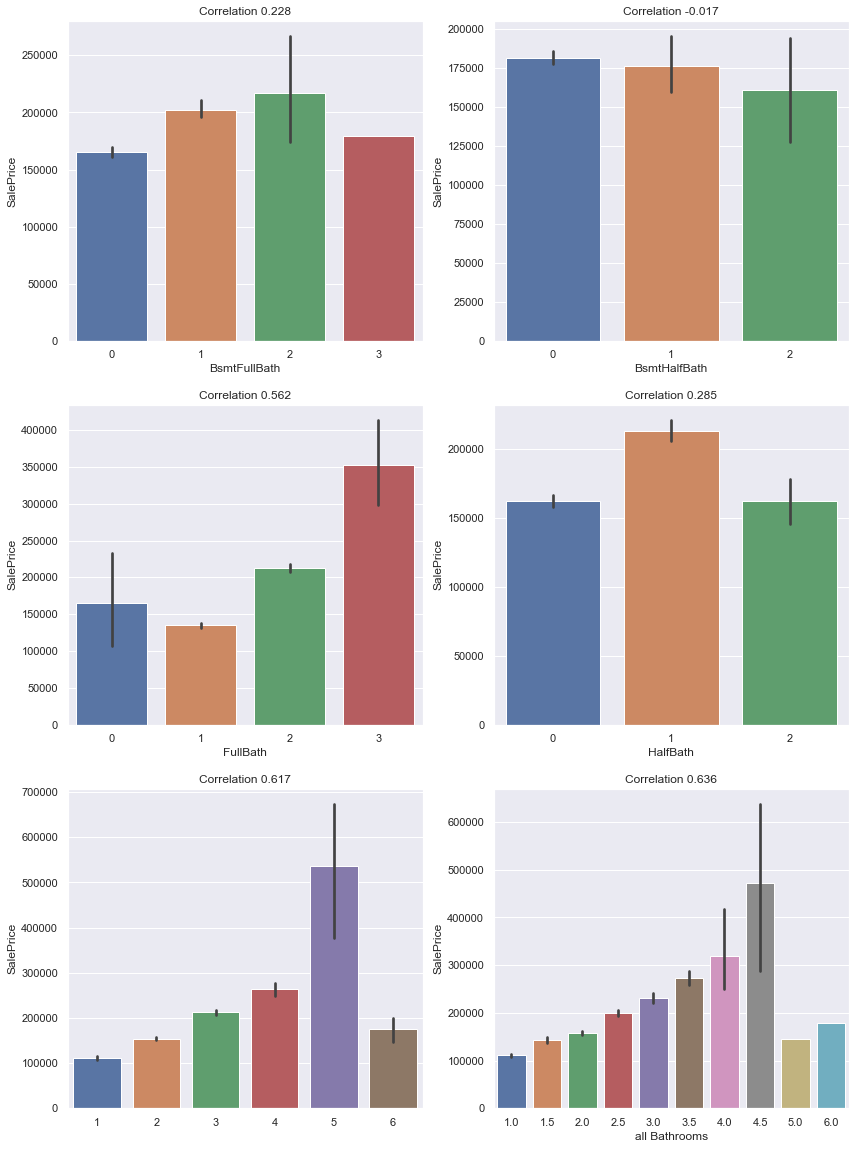

In [52]:
figure, ((ax1, ax2), (ax3,ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(14,20)

sns.barplot(df_train['BsmtFullBath'], df_train['SalePrice'], ax=ax1)
ax1.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['BsmtFullBath'])))

sns.barplot(df_train['BsmtHalfBath'], df_train['SalePrice'], ax=ax2)
ax2.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['BsmtHalfBath'])))

sns.barplot(df_train['FullBath'], df_train['SalePrice'], ax=ax3)
ax3.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['FullBath'])))

sns.barplot(df_train['HalfBath'], df_train['SalePrice'], ax=ax4)
ax4.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['HalfBath'])))

temp = df_train['HalfBath'] + df_train['FullBath'] + df_train['BsmtHalfBath'] + df_train['BsmtFullBath']
sns.barplot(temp, df_train['SalePrice'], ax=ax5)
ax5.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(temp)))

df_train['allBath'] = df_train['HalfBath']/2 + df_train['FullBath'] + df_train['BsmtHalfBath']/2 + df_train['BsmtFullBath']
sns.barplot(df_train['allBath'], df_train['SalePrice'], ax=ax6)
ax6.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['allBath'])))
ax6.set_xlabel('all Bathrooms')
plt.show()

In [53]:
x_train = df_train[['OverallQual', 'GrLivArea', 'GarageArea', 'allBath', 'YearBuilt', 'totalSF']]
y_train = df_train['logSalePrice']
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  0.8518079170992159


### YearBuilt

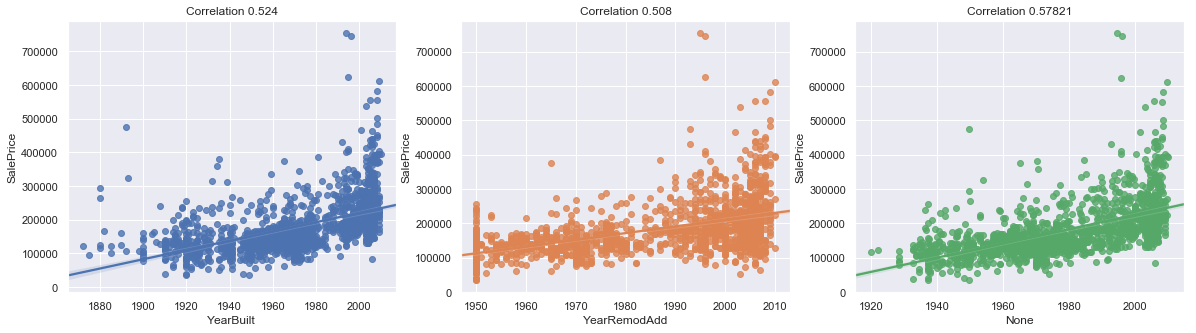

In [54]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(20,5)
sns.regplot(df_train['YearBuilt'], df_train['SalePrice'], ax=ax1)
ax1.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['YearBuilt'])))

sns.regplot(df_train['YearRemodAdd'], df_train['SalePrice'], ax=ax2)
ax2.set_title('Correlation {:.3f}'.format(df_train['SalePrice'].corr(df_train['YearRemodAdd'])))

temp = (df_train['YearRemodAdd']-df_train['YearBuilt'])*.57 + df_train['YearBuilt']
sns.regplot(temp, df_train['SalePrice'], ax=ax3)
ax3.set_title('Correlation {:.5f}'.format(df_train['SalePrice'].corr(temp)))

df_train['totalBuilt'] = (df_train['YearRemodAdd']-df_train['YearBuilt'])*.57 + df_train['YearBuilt']

In [55]:
x_train = df_train[['OverallQual', 'GrLivArea', 'GarageArea', 'allBath', 'totalBuilt', 'totalSF']]
y_train = df_train['logSalePrice']
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  0.8579667448921947


## Handling Categorial Attributes

In [56]:
garage=['GarageArea','GarageCars','GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt']
Garage=df_train[garage]

In [57]:
Garage.head()

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
0,548,2,TA,RFn,TA,Attchd,2003.0
1,460,2,TA,RFn,TA,Attchd,1976.0
2,608,2,TA,RFn,TA,Attchd,2001.0
3,642,3,TA,Unf,TA,Detchd,1998.0
4,836,3,TA,RFn,TA,Attchd,2000.0


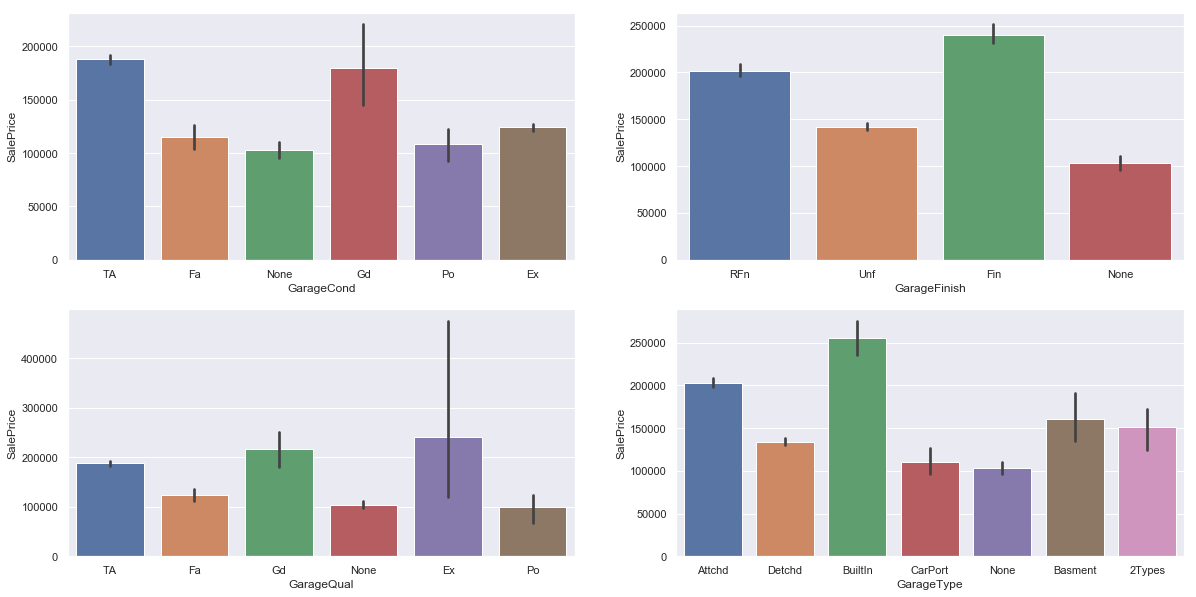

In [58]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20,10)

sns.barplot(Garage['GarageCond'], df_train['SalePrice'], ax=ax1)
sns.barplot(Garage['GarageFinish'], df_train['SalePrice'], ax=ax2)
sns.barplot(Garage['GarageQual'], df_train['SalePrice'], ax=ax3)
sns.barplot(Garage['GarageType'], df_train['SalePrice'], ax=ax4)
plt.show()

In [59]:
Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)

In [60]:
print(df_train['SalePrice'].corr(Garage['GarageArea']))
print(df_train['SalePrice'].corr(Garage['GarageCars']))
print(df_train['SalePrice'].corr(Garage['GarageCond']))
print(df_train['SalePrice'].corr(Garage['GarageFinish']))
print(df_train['SalePrice'].corr(Garage['GarageQual']))
print(df_train['SalePrice'].corr(Garage['GarageType']))

0.6292174507181137
0.641047007641277
0.26324920258120205
0.5502546017494928
0.27389750978080063
0.48905294836584


In [61]:
df_train['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars'])*(Garage['GarageFinish']) * (
    Garage['GarageQual']) *(Garage['GarageType'])
print(df_train['SalePrice'].corr(df_train['GarageScore']))

0.7837915441871915


In [62]:
x_train = df_train[['OverallQual', 'GrLivArea', 'GarageArea', 'allBath', 'totalBuilt', 'totalSF', 'GarageScore']]
y_train = df_train['logSalePrice']
scores = cross_val_score(estimator=lm, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print(" CV score = ", scores.mean())

 CV score =  0.8591341699695342


## Let's try a better regression model

In [63]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor# Import Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=0)
scores = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print("Random Forest CV score = ", scores.mean())

Random Forest CV score =  0.854163010461153


In [64]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor# Import Random Forest Regressor
# rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=0)
Boost = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
scores = cross_val_score(estimator=Boost, X=x_train, y=y_train, cv=10, n_jobs=1, scoring='r2')
print("Gradient Boosting CV score = ", scores.mean())

Gradient Boosting CV score =  0.8658179726689907
